# DATA 3401 midterm exam

## 0. Instructions
Complete this Jupyter notebook and upload it to Blackboard by 2:45pm.  

You can use any resources available on your laptop (textbook, notes, homework, google, etc), but you may not communicate with any person (in class or otherwise). 

Before you leave check in with me to verify that your exam has uploaded.   

In [3]:
from datascience import *
import numpy as np

%matplotlib inline
import matplotlib
import matplotlib.pyplot as plots
plots.style.use('fivethirtyeight')

## 1. Experiments

**Artemisinin** is a chemical used in drugs which fight malaria. In 2013, chemical engineering professor Jay Keasling  discovered a synthetic version of artemisinin.  

A group of researchers and statisticians tested the effectiveness of this new chemical.  They ran an experiment with a random sample of 500 malaria patients.  Each patient was randomly assigned to take either the artemisinin drug or a placebo pill.  The results of the study showed that among patients who took the drug, the proportion who recovered from malaria was much larger than among those who took the placebo.

**Question 1.1:** (5 pts)  Is this a randomized comparative experiment?  Explain why or why not. Write your answer in the cell below.

***Write your answer here***

Yes. It is randomized comparative experiment, because the patient was randomly assigned

**Question 1.2:** (5 pts) Should the researchers conclude that the drug **causes** an increase in recovery rate among malaria patients?

***Write your answer here***

Yes

## 2.  Dice, simulation, histogram
Suppose we have two fair dice, one red and one blue.  

Let random variable $D_1$ represent the outcome of the red die, and let $D_2$ represent the blue die.   

Consider the following trial: 
1. Roll the two dice.  
2. If $D_1 + D_2 = 7$, record the trial as a SUCCESS.  
3. If the sum is not 7, roll the blue die again, and recompute the sum $D_1 + D_2$.  
4. If the second sum is 7, record the trial as a SUCCESS. 
5. If the second sum is not 7, record the trial as a FAILURE. 

**Question 2.1:** (10 pts) The function below simulates the trial many times to produce an estimate of the probablility of SUCCESS. 

Add a docstring and replace the blanks to complete the function.   

In [4]:
def estimate(trials):

    sevens = 0
    faces  = np.arange(1, 7)
 
    for i in np.arange(trials):
        first  = np.random.choice(faces)
        second = np.random.choice(faces)
        
        if(first + second != 7):
            second = np.random.choice(faces)
        
        if(first + second == 7):
            sevens += 1
            
    return sevens / trials

Run **estimate()** with `trials = 1000`. 

In [5]:
estimate(1000)

0.295

**Question 2.2** (10 pts) Suppose a single experiment consists of estimating the probability of SUCCESS using 100 trials.  Use simulation to repeat this experiment 1000 times.  Record the estimated probability for each experiment and plot a histogram of your results.

In [6]:
experiment = []

for i in range(1000):
    experiment.append(estimate(100))

result = Table().with_column('outcome', experiment_1000)

result.hist()

NameError: name 'experiment_1000' is not defined

## 3. Visualizing categorical data
The graphic below appeared in the Berkeley campus newspaper.
![BerkeleyCrime.png](BerkeleyCrime.png)

**Question 3.1:** (4 pts)
Suppose we want to **visually** compare the number of crimes by category in a single year.  The graphic designer made two choices which make this difficult.  What were those choices?  and why do they make the visual comparison difficult?

***Write your answer here***

1/ "Robberies" and "Liquor Law Arrests"
2/ "Hate crimes" and "sex crimes"

Because we do not see the diference of the number of crimes. 

**Question 3.2:** (6 pts) The data shown in the graphic are given below.

|Year|Robberies|Liquor Law Arrests|Hate Crimes|Sex Crimes|
|----|---------|------------------|-----------|----------|
|2013|       16|                63|          9|        13|
|2014|       23|                35|          9|        15|
|2015|        9|                24|          2|        13|

Create a table called **cases** that holds these data. 

Use that table to produce a graphic that corrects the problems you identified in the previous question.  

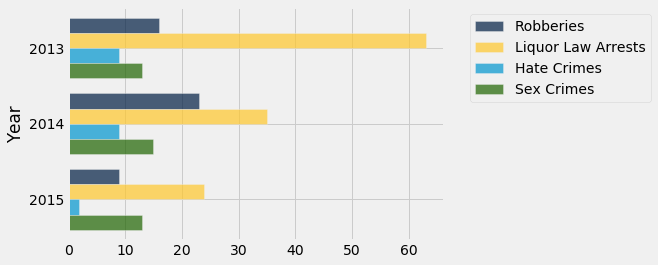

In [8]:
cases = Table().with_columns(['Year', [2013, 2014, 2015]
                              , 'Robberies', [16, 23, 9]
                              , 'Liquor Law Arrests', [63, 35, 24]
                              , 'Hate Crimes', [9, 9, 2]
                              , 'Sex Crimes', [13, 15, 13]
])

cases.barh('Year')

## 4. Data, tables, histograms, line plots

Consider the data files `child_mortality.csv` and `countries.csv`. 

`child_mortality.csv` contains three columns:  
- **`geo`**: country code
- **`time`**: year
- **`child_mortality_0_5_year_olds_dying_per_1000_born`** : child mortality rate (i.e. number of deaths of children ages 0-5 per 1000 born)

`countries.csv` has one row for each country.  There are many columns, and we will use these three:  
- **`country`** : country code
- **`name`**: name of the country
- **`world_6region`**: world region in which the country is located (using a partition of the world into 6 regions).

**Question 4.1** (10 pts)  Create two tables called `child_mortality` and `countries` by reading in the corresponding .csv files.

In [10]:
countries = Table.read_table("countries.csv")
countries

country,gwid,name,world_6region,income_groups,landlocked,g77_and_oecd_countries,main_religion_2008,gapminder_list,alternative_1,alternative_2,alternative_3,alternative_4_cdiac,pandg,god_id,alt_5,upper_case_name,code,number,arb1,arb2,arb3,arb4,arb5,arb6,is--country,world_4region,latitude,longitude
abkh,i0,Abkhazia,europe_central_asia,nan,nan,others,nan,Abkhazia,nan,nan,nan,nan,nan,GE-AB,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,True,europe,nan,nan
afg,i1,Afghanistan,south_asia,low_income,landlocked,g77,muslim,Afghanistan,Islamic Republic of Afghanistan,nan,nan,Afghanistan,AFGHANISTAN,AF,nan,AFGHANISTAN,AFG,4,nan,nan,nan,nan,nan,nan,True,asia,33,66
akr_a_dhe,i2,Akrotiri and Dhekelia,europe_central_asia,nan,coastline,others,nan,Akrotiri and Dhekelia,nan,nan,nan,nan,nan,Akrotiri_Dhekelia,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,True,europe,nan,nan
alb,i3,Albania,europe_central_asia,upper_middle_income,coastline,others,muslim,Albania,nan,nan,nan,Albania,ALBANIA,AL,nan,ALBANIA,ALB,8,nan,nan,nan,nan,nan,nan,True,europe,41,20
dza,i4,Algeria,middle_east_north_africa,upper_middle_income,coastline,g77,muslim,Algeria,nan,nan,nan,Algeria,ALGERIA,DZ,nan,ALGERIA,DZA,12,nan,nan,nan,nan,nan,nan,True,africa,28,3
asm,i5,American Samoa,east_asia_pacific,upper_middle_income,coastline,others,christian,American Samoa,nan,nan,nan,nan,nan,AS,nan,AMERICAN SAMOA,ASM,16,nan,nan,nan,nan,nan,nan,True,asia,-11.056,-171.082
and,i6,Andorra,europe_central_asia,high_income,landlocked,others,christian,Andorra,nan,nan,nan,nan,nan,AD,nan,ANDORRA,AND,20,nan,nan,nan,nan,nan,nan,True,europe,42.5078,1.52109
ago,i7,Angola,sub_saharan_africa,upper_middle_income,coastline,g77,christian,Angola,nan,nan,nan,Angola,ANGOLA,AO,nan,ANGOLA,AGO,24,nan,nan,nan,nan,nan,nan,True,africa,-12.5,18.5
aia,i8,Anguilla,america,nan,coastline,others,christian,Anguilla,nan,nan,nan,nan,nan,AI,nan,ANGUILLA,AIA,660,nan,nan,nan,nan,nan,nan,True,americas,18.2167,-63.05
ata,nan,Antarctica,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,AQ,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,True,europe,-90,0


In [11]:
child_mortality = Table.read_table("child_mortality.csv")
child_mortality

geo,time,child_mortality_0_5_year_olds_dying_per_1000_born
afg,1800,468.6
afg,1801,468.6
afg,1802,468.6
afg,1803,468.6
afg,1804,468.6
afg,1805,468.6
afg,1806,470
afg,1807,470
afg,1808,470
afg,1809,470


**Question 4.2** (10 pts)  Build a table called `child_mortality_by_year` that shows the mean child mortality rate for each year.  Use this table to identify the average child mortality rates in the years 1800, 1900, and 2000.

In [12]:
child_mortality_by_year = child_mortality.select('time', "child_mortality_0_5_year_olds_dying_per_1000_born")

child_mortality_by_year

time,child_mortality_0_5_year_olds_dying_per_1000_born
1800,468.6
1801,468.6
1802,468.6
1803,468.6
1804,468.6
1805,468.6
1806,470
1807,470
1808,470
1809,470


In [13]:
child_mortality_1800 = np.mean(child_mortality_by_year.where('time', are.between_or_equal_to(1800, 1899))\
                               .select('child_mortality_0_5_year_olds_dying_per_1000_born'))
child_mortality_1900 = np.mean(child_mortality_by_year.where('time', are.between_or_equal_to(1900, 1999))\
                               .select('child_mortality_0_5_year_olds_dying_per_1000_born'))
child_mortality_2000 = np.mean(child_mortality_by_year.where('time', are.above_or_equal_to(2000))\
                               .select('child_mortality_0_5_year_olds_dying_per_1000_born'))

child_mortality_1800, child_mortality_1900, child_mortality_2000

/Users/anh/anaconda3/lib/python3.7/site-packages/datascience/tables.py:193: FutureWarning: Implicit column method lookup is deprecated.
  warnings.warn("Implicit column method lookup is deprecated.", FutureWarning)


(child_mortality_0_5_year_olds_dying_per_1000_born
 406.739, child_mortality_0_5_year_olds_dying_per_1000_born
 217.339, child_mortality_0_5_year_olds_dying_per_1000_born
 41.066)

**Question 4.3** (15 pts) Build histograms of the child mortalilty rates for each of the years 1800, 1900, and 2000.  
Use bins ranging from 0 to 550 with width = 25.  

The first thing to ask yourself is which table to use.  Write your answer in the cell below.

***Write your answer here***
...

In [14]:
mybins = range(0, 550, 25)

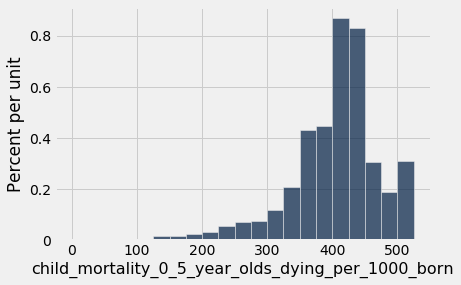

In [15]:
# histogram: year=1800
child_mortality_by_year.where('time', are.between_or_equal_to(1800, 1899))\
    .hist('child_mortality_0_5_year_olds_dying_per_1000_born', bins=mybins)

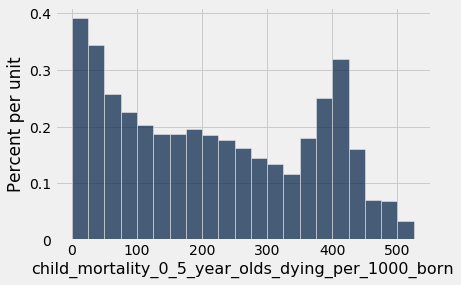

In [16]:
# histogram: year=1900
child_mortality_by_year.where('time', are.between_or_equal_to(1900, 1999))\
    .hist('child_mortality_0_5_year_olds_dying_per_1000_born', bins=mybins)

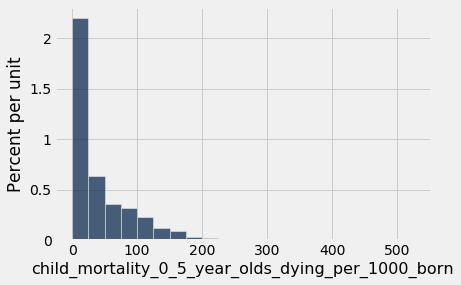

In [17]:
# histogram: year=2000
child_mortality_by_year.where('time', are.above_or_equal_to(2000))\
    .hist('child_mortality_0_5_year_olds_dying_per_1000_born', bins=mybins)

What story do the histograms tell about global child mortality since 1800?  

***Write your response here***

...

**Question 4.4** (10 pts) Use the `countries` and `child_mortality` tables to create a new table called `child_mortality2` that contains all of the information from the `child_mortality` table with an additional column specifying the region of the country.

In [18]:
child_mortality2 = child_mortality.join('geo', countries, 'country')
child_mortality2

geo,time,child_mortality_0_5_year_olds_dying_per_1000_born,gwid,name,world_6region,income_groups,landlocked,g77_and_oecd_countries,main_religion_2008,gapminder_list,alternative_1,alternative_2,alternative_3,alternative_4_cdiac,pandg,god_id,alt_5,upper_case_name,code,number,arb1,arb2,arb3,arb4,arb5,arb6,is--country,world_4region,latitude,longitude
abw,1980,26.34,i12,Aruba,america,high_income,coastline,others,christian,Aruba,nan,nan,nan,Aruba,nan,AW,nan,ARUBA,ABW,533,nan,nan,nan,nan,nan,nan,True,americas,12.5,-69.9667
abw,1981,25.4,i12,Aruba,america,high_income,coastline,others,christian,Aruba,nan,nan,nan,Aruba,nan,AW,nan,ARUBA,ABW,533,nan,nan,nan,nan,nan,nan,True,americas,12.5,-69.9667
abw,1982,24.6,i12,Aruba,america,high_income,coastline,others,christian,Aruba,nan,nan,nan,Aruba,nan,AW,nan,ARUBA,ABW,533,nan,nan,nan,nan,nan,nan,True,americas,12.5,-69.9667
abw,1983,23.96,i12,Aruba,america,high_income,coastline,others,christian,Aruba,nan,nan,nan,Aruba,nan,AW,nan,ARUBA,ABW,533,nan,nan,nan,nan,nan,nan,True,americas,12.5,-69.9667
abw,1984,23.48,i12,Aruba,america,high_income,coastline,others,christian,Aruba,nan,nan,nan,Aruba,nan,AW,nan,ARUBA,ABW,533,nan,nan,nan,nan,nan,nan,True,americas,12.5,-69.9667
abw,1985,23.14,i12,Aruba,america,high_income,coastline,others,christian,Aruba,nan,nan,nan,Aruba,nan,AW,nan,ARUBA,ABW,533,nan,nan,nan,nan,nan,nan,True,americas,12.5,-69.9667
abw,1986,22.91,i12,Aruba,america,high_income,coastline,others,christian,Aruba,nan,nan,nan,Aruba,nan,AW,nan,ARUBA,ABW,533,nan,nan,nan,nan,nan,nan,True,americas,12.5,-69.9667
abw,1987,22.76,i12,Aruba,america,high_income,coastline,others,christian,Aruba,nan,nan,nan,Aruba,nan,AW,nan,ARUBA,ABW,533,nan,nan,nan,nan,nan,nan,True,americas,12.5,-69.9667
abw,1988,22.62,i12,Aruba,america,high_income,coastline,others,christian,Aruba,nan,nan,nan,Aruba,nan,AW,nan,ARUBA,ABW,533,nan,nan,nan,nan,nan,nan,True,americas,12.5,-69.9667
abw,1989,22.5,i12,Aruba,america,high_income,coastline,others,christian,Aruba,nan,nan,nan,Aruba,nan,AW,nan,ARUBA,ABW,533,nan,nan,nan,nan,nan,nan,True,americas,12.5,-69.9667


**Question 4.5** (10 pts) Using the `child_mortality2` table, create a table called `child_mortality_by_region` that contains
- one row for each year
- one column for each region
- the mean child mortality rates for each region in each year.

*Hint 1: You may find the `pivot` method useful*

*Hint 2: The function `np.mean` computes the mean of an array*

In [19]:
child_mortality_by_region = child_mortality2.pivot('world_6region', 'time', \
                values='child_mortality_0_5_year_olds_dying_per_1000_born', collect=np.mean)

child_mortality_by_region

time,america,east_asia_pacific,europe_central_asia,middle_east_north_africa,south_asia,sub_saharan_africa
1800,432.858,439.069,384.194,443.61,465.8,440.271
1801,432.255,438.6,382.451,443.61,465.663,440.15
1802,431.615,438.115,380.8,443.61,465.525,440.027
1803,431.015,437.65,379.994,443.61,465.387,439.906
1804,430.424,437.177,379.29,443.61,465.25,439.788
1805,429.806,436.704,378.512,443.6,465.112,439.64
1806,429.212,436.246,379.139,443.6,465.163,439.521
1807,428.6,435.781,377.733,443.6,465.038,439.404
1808,428.027,435.327,378.369,443.6,464.887,439.29
1809,427.421,434.869,377.788,443.6,464.762,439.173


**Question 4.6** (5 pts) Use the table `child_mortality_by_region` to plot line graphs of child mortality rates vs. time for each region on one set of axes.

In [ ]:
...
...